### Boosting

**Boosting** adalah algoritma untuk menciptakan weak learner secara berurutan, sehingga setiap learner baru (pohon) memperbaiki error dari learner sebelumnya. Weak learner adalah model yang memiliki akurasi rendah.



Notebook ini mengimplementasikan algoritma **XGBoost** untuk melakukan klasifikasi spesies bunga Iris.

### Import library dan dataset
Spesies Iris pada dataset adalah :
* Iris-setosa -> 0
* Iris-versicolor -> 1
* Iris-virginica -> 2

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb # Library untuk algoritma XGBoost
df = pd.read_csv('/content/Iris_clean.csv')

In [2]:
  df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split dataset
Memisah dataset menjadi dua bagian, data training dan data testing dengan pembagian :
* 60% data untuk **training**
* 40% data untuk **testing**

In [3]:
# X -> Merepresentasikan data-data yang digunakan untuk klasifikasi
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# y -> Merepresentasikan label dari data (pada kasus ini spesies Iris) 
y = df['Species']

# Memisahkan data training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

### XGBoost (eXtreme Gradient Boosting)
XGBoost adalah penerapan dari algoritma **Gradient Boosting**. 

XGBoost mengoptimasi algoritma Gradient Boosting dengan melakukan komputasi paralel, pemangkasan pohon, penanganan data yang hilang, dan regularization untuk menghindari overfitting dan bias.

Secara default, XGBoost menggunakan model **Decision Tree Ensemble**, yaitu model yang terdiri dari beberapa pohon (regression dan classification tree) yang digabungkan, lalu output (skor prediksi) dari setiap pohonnya akan dijumlahkan untuk mendapatkan prediksi terakhir.

Adapun parameter yang umum digunakan pada algoritma XGBoost :
* **`objective`** : Loss function yang digunakan.
 * `reg:linear` untuk permasalahan regresi .
 * `reg:logistic` untuk permasalahan logistic regression .
 * `binary:logistic` untuk permasalahan klasifikasi biner.
* **`colsample_bytree`** : Persentase dari feature yang akan digunakan pada setiap pohon. Persentase yang tinggi dapat menyebabkan overfitting.

* **`alpha`** : Menangani bagian regularization. Menaikkan nilai dari parameter ini dapat membuat model menjadi lebih konservatif. Cocok digunakan pada data yang besar.

* **`learning_rate`** : Pada setiap boosting step akan mendapatkan bobot dari feature baru, `learning_rate` mengurangi bobot tersebut agar algoritma lebih kuat.

* **`max_depth`** : Kedalaman maksimum pada pohon.

* **`n_estimators`** : Jumlah pohon yang ingin dibuat.

In [4]:
# Inisialisasi XGBoost classifier
model = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, alpha =  10,
                          learning_rate = 0.1, max_depth = 5, n_estimators = 100)
# Masukkan data training ke dalam object XGBoost
model.fit(X_train, y_train)
# Prediksi data test
y_pred = model.predict(X_test)

Secara garis besar, cara kerja **Gradient Boosting** adalah sebagai berikut.


1.   Menginisialisasi weak learner pertama (decision tree dengan satu percabangan/*decision stump*) dan menghitung performanya menggunakan Loss Function `objective`.
2.   Membuat learner kedua untuk mengurangi nilai Loss ketika ditambahkan dengan tree pertama.
3. Ulangi langkah tersebut sampai mendapatkan jumlah tree dan nilai Loss yang optimal.



In [5]:
# Hitung dan print akurasi model
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9167


### Visualisasi Pohon
Library xgboost memiliki fungsi bawaan `plot_tree()` untuk memvisualisasikan pohon yang digunakan. Parameter pada fungsi ini adalah object xgboost yang digunakan dan `num_trees`, pohon ke berapa yang ingin ditampilkan.

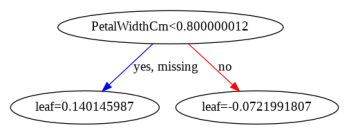

In [6]:
import matplotlib.pyplot as plt
# Menampilkan pohon pertama
xgb.plot_tree(model, num_trees=0)
# Mengatur size gambar
plt.rcParams['figure.figsize'] = [20, 10]